In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
%matplotlib inline

### Data Structures

GeoPandas implements two main data structures, a GeoSeries and a GeoDataFrame. These are subclasses of pandas Series and DataFrame, respectively.
GeoSeries: A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation
GeoDataFrame: A GeoDataFrame is a tabular data structure that contains atleast one GeoSeries.

Geopandas has three basic classes of geometric objects (which are actually shapely objects):

* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

^^ Read this (http://geopandas.org/data_structures.html#geodataframe) for more on data structure and their basic inbuilt methods which we will be using later: 

### Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database etc <br>

We can use the GeoPandas library to read many of those GIS file formats <br>

Few data sources for geospatial data: <br>
(1) Statsilk (https://www.statsilk.com/maps/download-free-shapefile-maps) <br>
(2) Natural Earth data (https://www.naturalearthdata.com/downloads/) <br>
(3) Opentopography (https://opentopography.org/ ) <br>
(4) or just check ou this 10 sources: (https://gisgeography.com/best-free-gis-data-sources-raster-vector/) <br>

Reading geospatial data using:  geopandas.read_file()

When a spatial method is applied to a GeoDataFrame,  this commands will always act on the “geometry” column. Only one column can be an active geometry at a time. To change which column is the active geometry column, use the set_geometry method.

In [3]:
NY_geo = gpd.read_file('C:\\Users\\Sanchayni\\Desktop\\Internship\\CapitalOne\\Coastal_Zone_Boundary.shp')

In [4]:
NY_geo.geometry
# Set of (longitudes, Latitudes) which forms the polygon

0    (POLYGON ((-74.0132576814735 40.7058795011323,...
Name: geometry, dtype: object

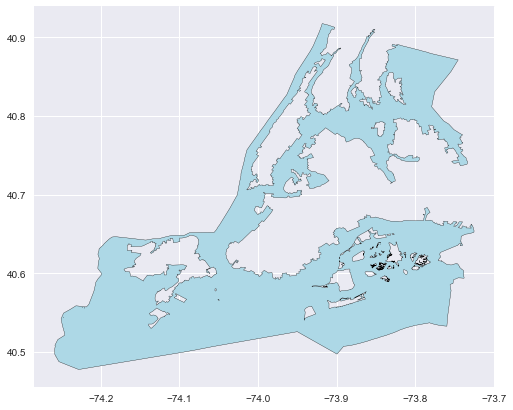

In [5]:
NY_geo.plot(figsize=(15,7),edgecolor='black', facecolor='lightblue')
plt.show()

In [6]:
# inbuilt geopandas dataframes
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


### Choropleth Maps

In [8]:
world.loc[world['pop_est'] <=0,]
# For some reason the population estimate of Africa is less than 0. 
# This might actually be a tag for missing value. As even gdp_md_est has -99 value

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
137,-99.0,Africa,W. Sahara,ESH,-99.0,POLYGON ((-8.794883999049077 27.12069631602251...


In [9]:
world.loc[world.name == "Antarctica"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...


Lets exclude Africa from the dataset for now

In [10]:
world = world[(world.pop_est>0) & (world.name!="Africa") & (world.name!="Antarctica")]

In [11]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

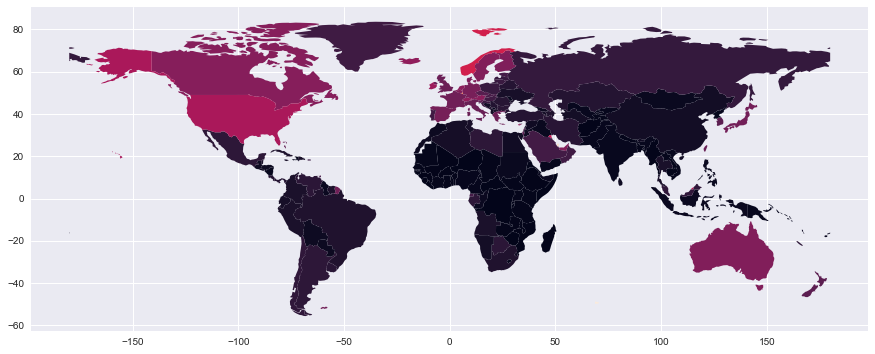

In [12]:
world.plot(column='gdp_per_cap',figsize=(15,7))
plt.show()

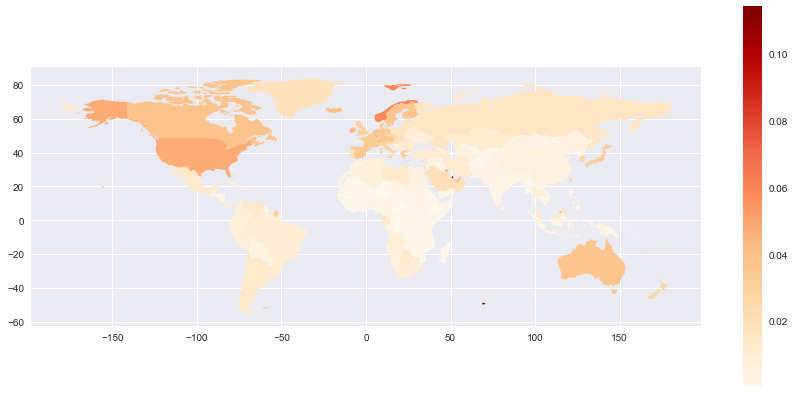

In [13]:
world.plot(column='gdp_per_cap', cmap='OrRd',figsize=(15,7), legend = True)
plt.show()

Color is distributed evenly across range but not the values. <br>
The scheme option can be set to ‘equal_interval’, ‘quantiles’ or ‘percentiles’.

C:\Users\Sanchayni\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


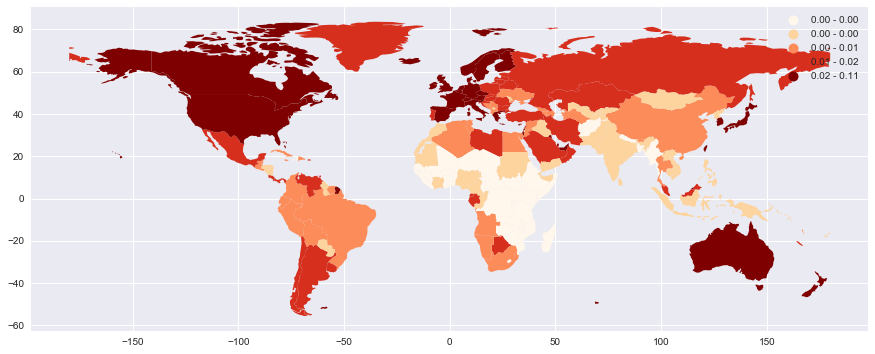

In [14]:
world.plot(column='gdp_per_cap', cmap='OrRd',figsize=(15,7),scheme = 'quantiles', legend = True)
plt.show()

### Maps with Layers

In [15]:
countries = gpd.read_file('C:\\Users\\Sanchayni\\Desktop\\Spring19\\Special Project\\GeoViz\\ne_110m_admin_0_countries.shp')
cities = gpd.read_file('C:\\Users\\Sanchayni\\Desktop\\Spring19\\Special Project\\GeoViz\\ne_110m_populated_places\\ne_110m_populated_places.shp')
rivers = gpd.read_file('C:\\Users\\Sanchayni\\Desktop\\Spring19\\Special Project\\GeoViz\\ne_50m_rivers_lake_centerlines\\ne_50m_rivers_lake_centerlines.shp')

# I downloaded this data from: http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/ 

In [16]:
print(type(countries['geometry'][0]), type(rivers['geometry'][0]), type(cities['geometry'][0]))

<class 'shapely.geometry.multipolygon.MultiPolygon'> <class 'shapely.geometry.linestring.LineString'> <class 'shapely.geometry.point.Point'>


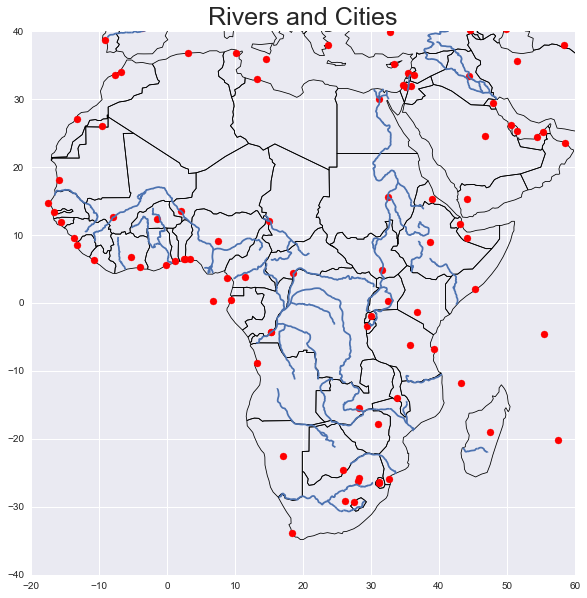

In [17]:
ax = countries.plot(edgecolor='k', facecolor='None', figsize=(15, 10), legend = True, linewidth=0.8)
ax.set_title('Rivers and Cities', fontdict={'fontsize': '25', 'fontweight' : '3'})
#ax.axis('off')
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))
plt.show()

### Creating a GeoDataFrame from a DataFrame with coordinates

In [18]:
from shapely.geometry import Point,Polygon

In [19]:
twitter_data = pd.read_csv('C:\\Users\\Sanchayni\\Desktop\\Spring19\\Special Project\\GeoViz\\twitter.csv')
# Highly likely fabricates data

In [20]:
twitter_data.head()

,lat,lon,value
0,-0.0,-78.4,1
1,-0.0,0.0,5
2,-0.0,109.3,198
3,-0.0,109.4,3
4,-0.1,-78.4,1


In [21]:
twitter_data['Coordinates'] = list(zip(twitter_data.lon, twitter_data.lat))
twitter_data['Coordinates'] = twitter_data['Coordinates'].apply(Point)

In [22]:
twitter_data.head()

,lat,lon,value,Coordinates
0,-0.0,-78.4,1,POINT (-78.40000000000001 -0)
1,-0.0,0.0,5,POINT (0 -0)
2,-0.0,109.3,198,POINT (109.3 -0)
3,-0.0,109.4,3,POINT (109.4 -0)
4,-0.1,-78.4,1,POINT (-78.40000000000001 -0.1)


In [23]:
Geo_twitter_data = gpd.GeoDataFrame(twitter_data, geometry='Coordinates')
Geo_twitter_data.head()

,lat,lon,value,Coordinates
0,-0.0,-78.4,1,POINT (-78.40000000000001 -0)
1,-0.0,0.0,5,POINT (0 -0)
2,-0.0,109.3,198,POINT (109.3 -0)
3,-0.0,109.4,3,POINT (109.4 -0)
4,-0.1,-78.4,1,POINT (-78.40000000000001 -0.1)


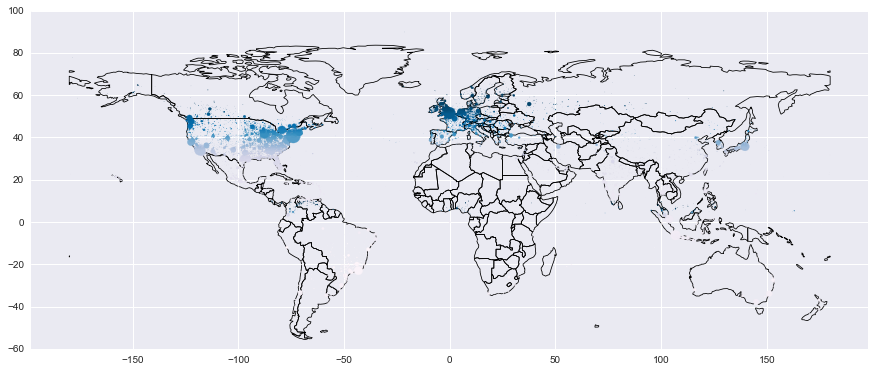

In [25]:
ax = countries.plot(edgecolor='k', facecolor='None', figsize=(15, 10), legend = True, linewidth=0.8)
Geo_twitter_data.plot(ax=ax, cmap='PuBu', markersize = twitter_data['value']/200, scheme = 'quantiles')
#Geo_twitter_data.plot(ax=ax, cmap='OrRd', markersize = twitter_data['value']/500, scheme = 'quantiles')
#ax.set( ylim=(20, 60), xlim=(-150,-50))
ax.set( ylim=(-60, 100))
plt.show()

Use parameter 'c' for color coding based on nominal variable (like cluster number)

 Read more on styling your maps: http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

### Street Maps 
with folium

In [26]:
import folium

In [54]:
m = folium.Map([48.8566, 2.3429], zoom_start=10, tiles="OpenStreetMap")
folium.GeoJson(countries.to_json()).add_to(m)
m

In [29]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
data

,lat,lon,name
0,-58.00,-34.00,Buenos Aires
1,2.00,49.00,Paris
2,145.00,-38.00,melbourne
3,30.32,59.93,St Petersbourg
4,-4.03,5.33,Abidjan
5,-73.57,45.52,Montreal
6,36.82,-1.29,Nairobi
7,-38.50,-12.97,Salvador


In [107]:
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
# Adding markers
for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)
m

In [80]:
SFPD_incidents = pd.read_csv('C:\\Users\\Sanchayni\\Desktop\\Spring19\\Special Project\\SF_data\\PDIR_03_18.csv', nrows= 100)

In [81]:
print(SFPD_incidents.shape)
SFPD_incidents.head()

(100, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [ ]:
SFPD_incidents['Category'] = SFPD_incidents['Category'].astype('category')

In [111]:
SFPD_incidents['Category'].unique()

[NON-CRIMINAL, ROBBERY, ASSAULT, SECONDARY CODES, VANDALISM, ..., MISSING PERSON, DRIVING UNDER THE INFLUENCE, SUSPICIOUS OCC, RECOVERED VEHICLE, DRUNKENNESS]
Length: 18
Categories (18, object): [NON-CRIMINAL, ROBBERY, ASSAULT, SECONDARY CODES, ..., DRIVING UNDER THE INFLUENCE, SUSPICIOUS OCC, RECOVERED VEHICLE, DRUNKENNESS]


In [129]:
SF_COORDINATES = (37.76, -122.45)
map_SF = folium.Map(location=SF_COORDINATES, zoom_start=12)

In [132]:
# add a marker for every record in the filtered data
for i in range(len(SFPD_incidents)):
    if(SFPD_incidents['Category'][i] in ['ASSAULT','VANDALISM']):
        folium.Marker(location = [SFPD_incidents['Y'][i],SFPD_incidents['X'][i]],icon= 
                  folium.Icon(color='red',icon='exclamation-sign') , 
                  popup = SFPD_incidents['Category'][i]).add_to(map_SF)
    else:
        folium.Marker(location = [SFPD_incidents['Y'][i],SFPD_incidents['X'][i]],icon= 
                  folium.Icon(color='blue') ,
                  popup = SFPD_incidents['Category'][i]).add_to(map_SF)


In [133]:
map_SF